#                                          Problem Statement
##                                        **Big Mart Sales Prediction ML  Problem**

**Bigmart Sales Prediction** is a regression problem where we have to analyze and predict the sales of Bigmart based on various aspects of the dataset. The objective is to build a predictive model and discover the sales of each product at their respective store.

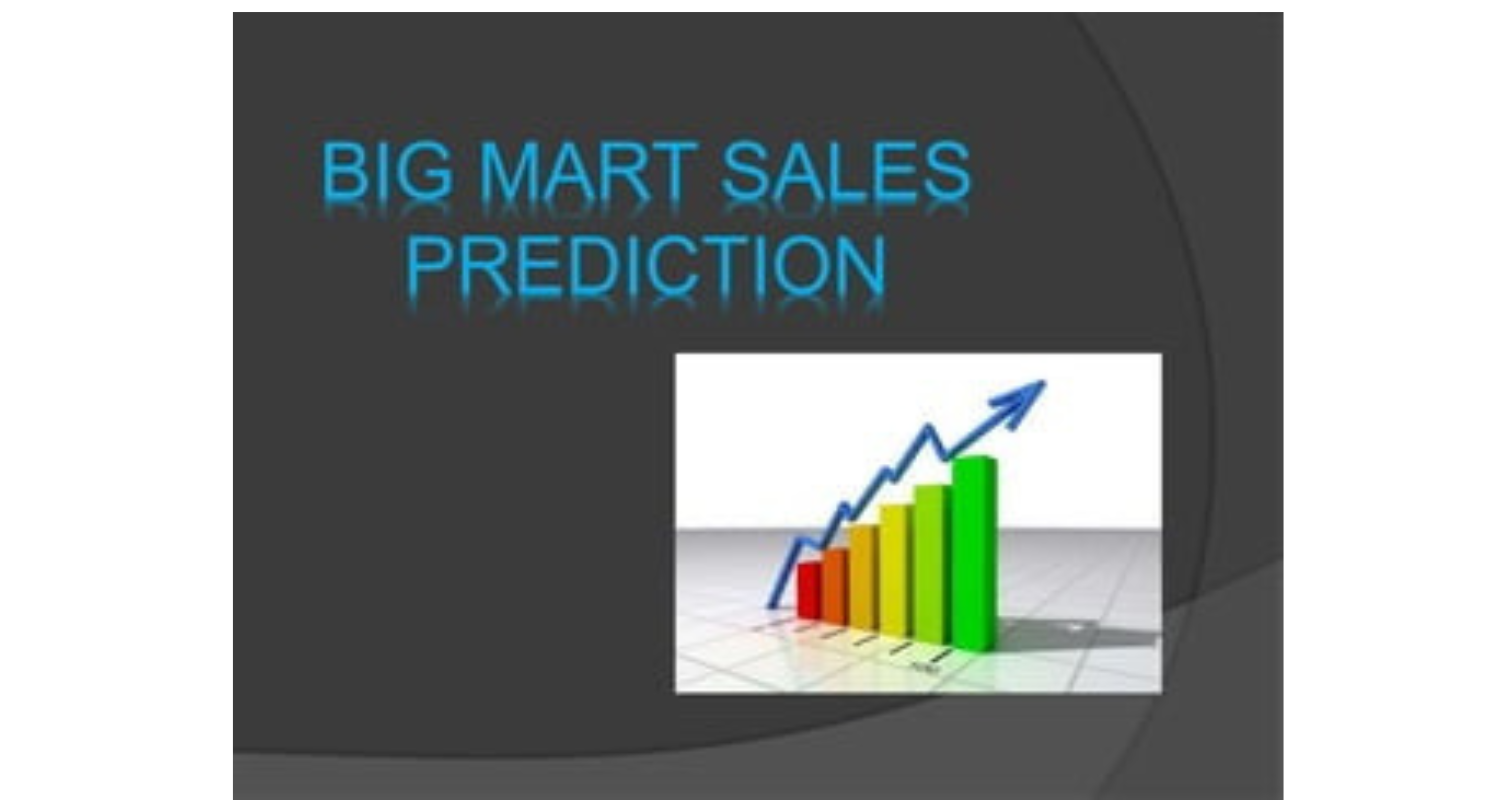

In [274]:
# Importing all the required libraries and visualization tools 

import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.stats import probplot
import scipy.stats as stats 

from sklearn.model_selection import train_test_split

#importing encoding libraries
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder

#importing scaling libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler

#importing best feature selection libraries
from sklearn.feature_selection import SelectKBest,chi2 


#importing imputation libraries
from sklearn.impute import SimpleImputer,KNNImputer,MissingIndicator
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


#importing column transformer and pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import FunctionTransformer,PowerTransformer

#importing all the algorithm of Regressor problems
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

#performance metrics for model
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings("ignore")

In [176]:
#importing data from csv file available in kaggle
df = pd.read_csv('Supermart_Train.csv')


In [177]:
#check for top five rows
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [178]:
#check for last five rows
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [179]:
#checking the shape of dataframe
df.shape
#data contains 8523 rows and 12 column

(8523, 12)

In [180]:
#check for % of nan values in the given dataframe
df.isnull().mean()*100
#17% missing value in item_weight feature - Need imputation
#28% missing value in outlet_type feature - Need imputation

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [181]:
#check for duplicated values in the given dataframe
df.duplicated().sum()
#no duplicate values present in the given dataframe

0

In [182]:
#check for info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [183]:
#function to get value_counts corresponding to unique categories 

df['Item_Fat_Content'] = df.Item_Fat_Content.apply(lambda x: 'Low Fat' if x in ['low fat','LF'] else x)
df['Item_Fat_Content'] = df.Item_Fat_Content.apply(lambda x: 'Regular' if x in 'reg' else x)

def unique_categories(data):
    for col in data:
        if df[col].dtype == 'object':
            print(col)
            print('-'*125)
            print(df[col].value_counts())
            
            print(''*125)
            print('='*125)
            print('='*125)
            print(''*125)
unique_categories(df)        
#each of the feature with datatype as object has countable type of categories except Item_identifier ()  
#Item fat count column was having naming issue (same kind of product was having different name- Same was rectified)

Item_Identifier
-----------------------------------------------------------------------------------------------------------------------------
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Item_Fat_Content
-----------------------------------------------------------------------------------------------------------------------------
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


Item_Type
-----------------------------------------------------------------------------------------------------------------------------
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                  

# Exploratory Data analysis

## Univariate analysis

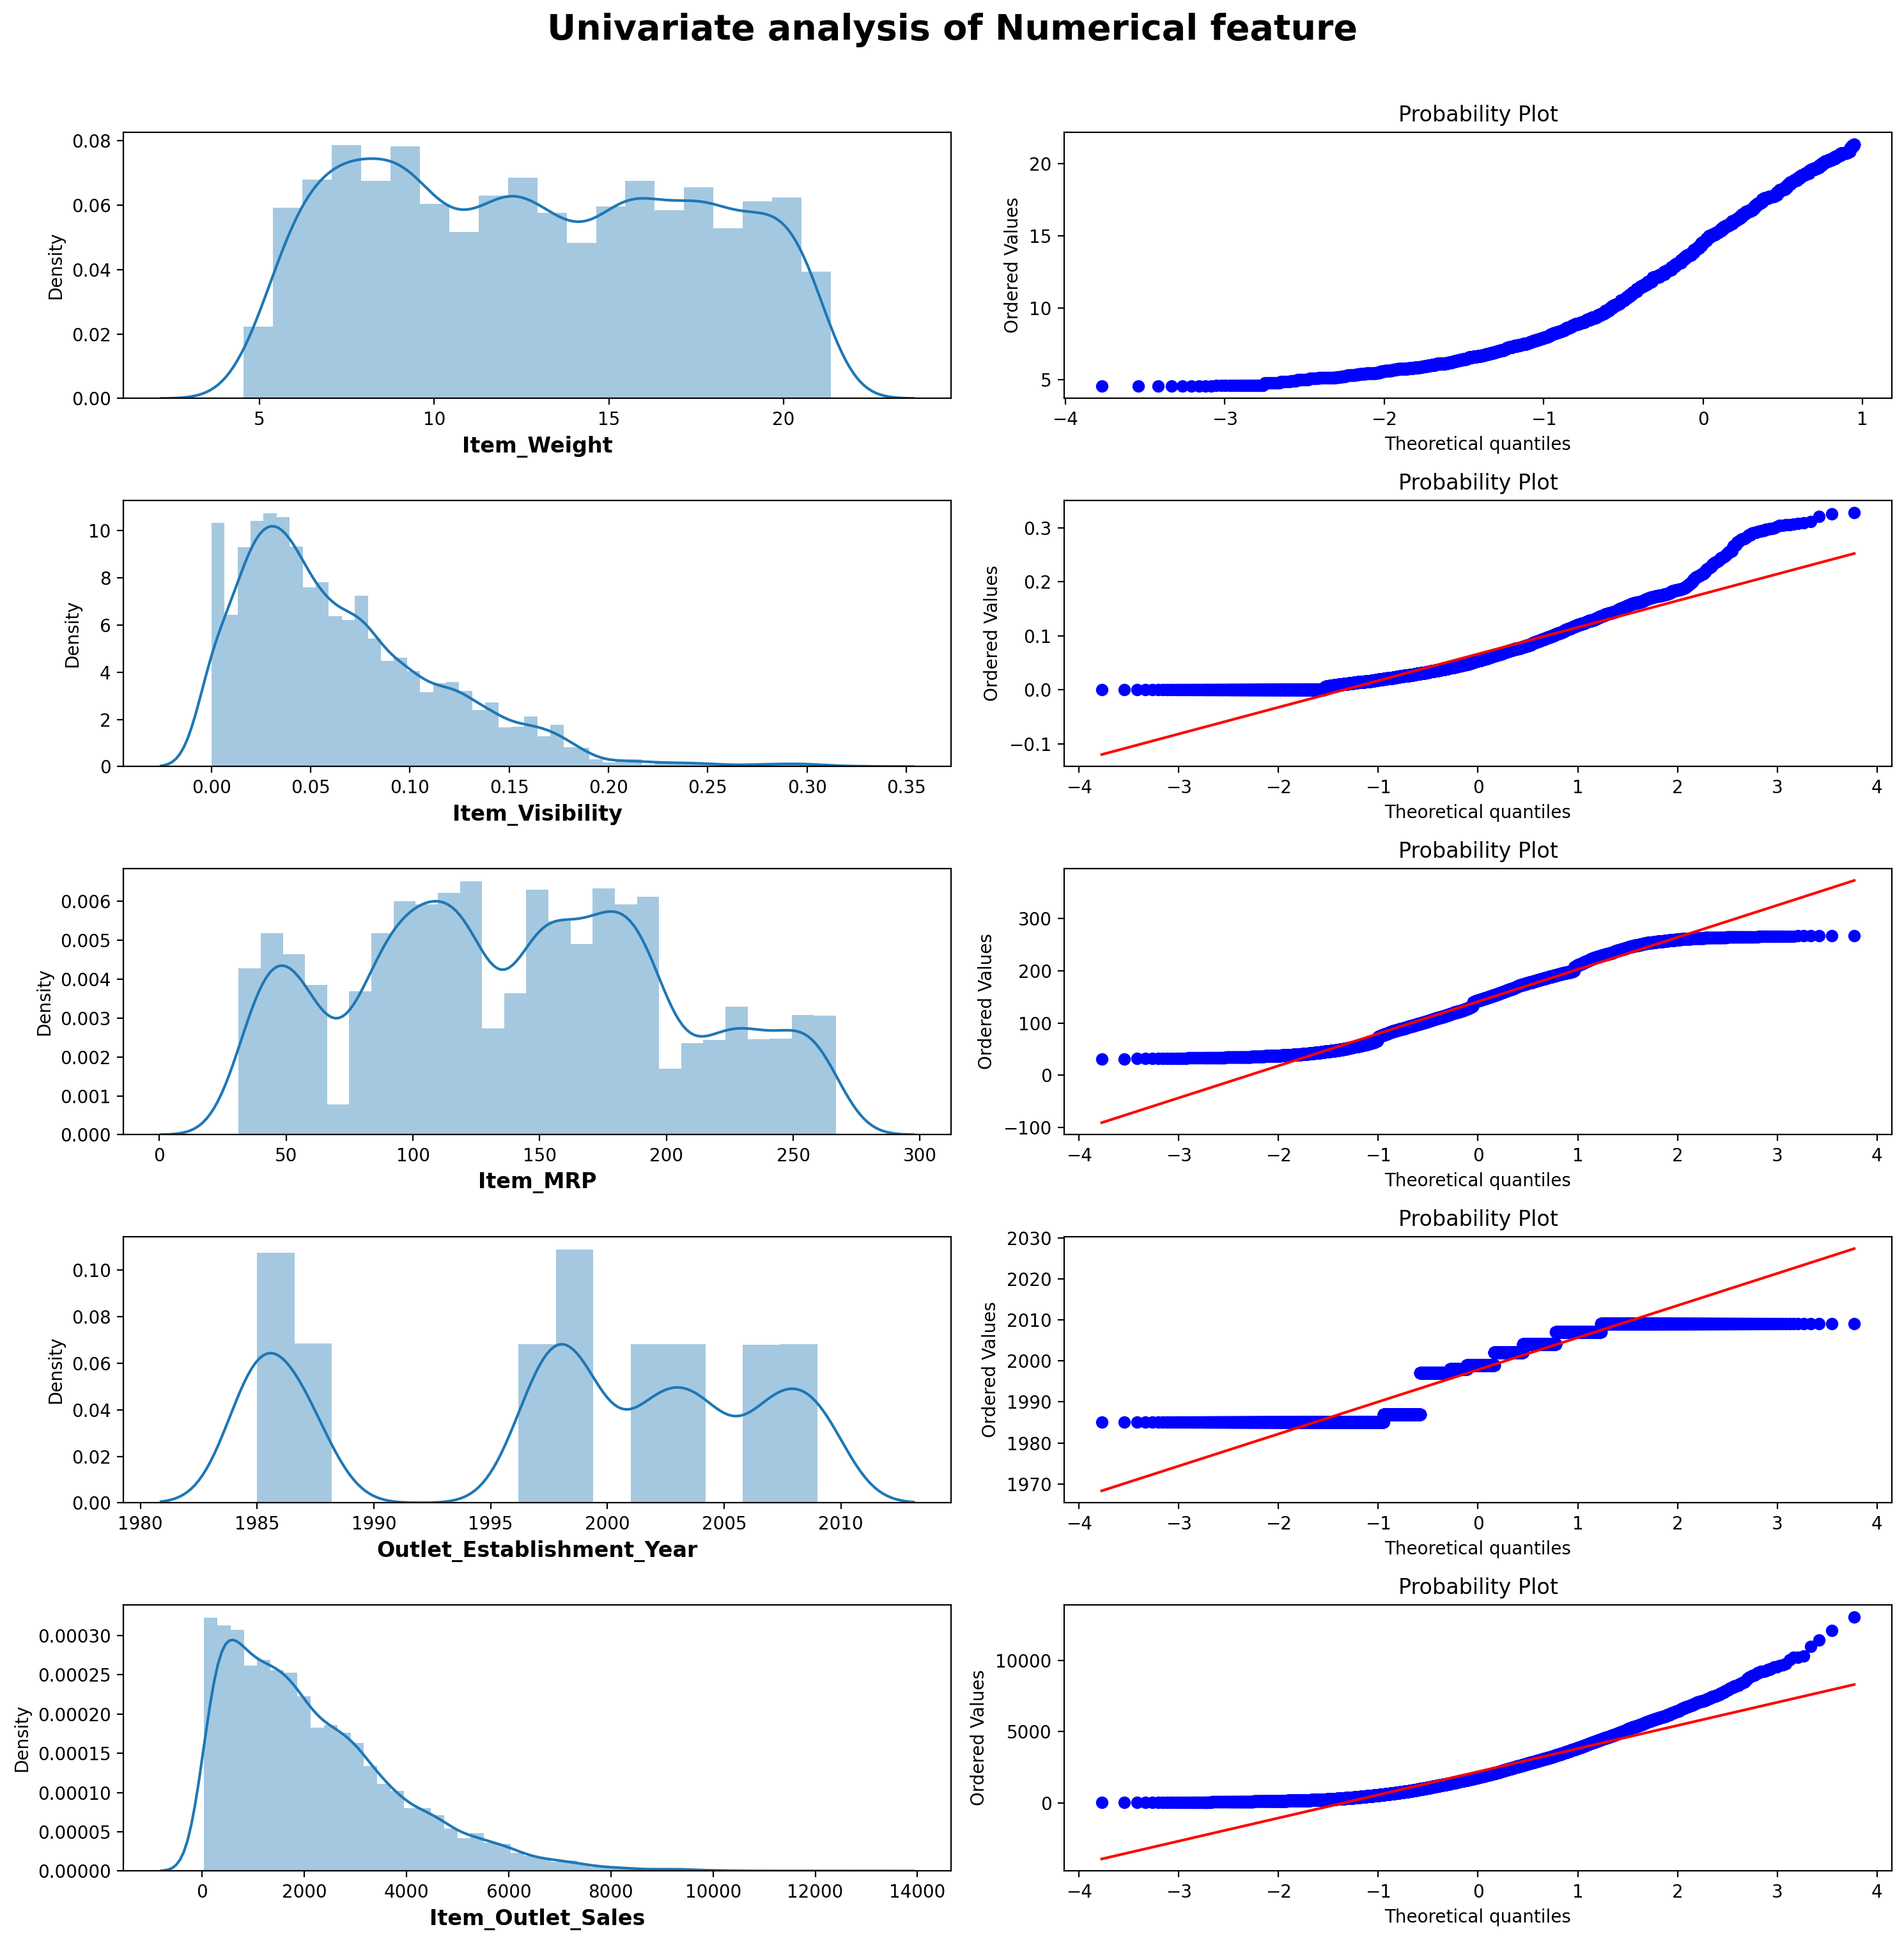

In [184]:
# Dist and QQ plot for numerical columns
def univariate_distplot_QQ_numerical(data):
    plt.figure(figsize=(15,15),dpi=200)
    plt.suptitle('Univariate analysis of Numerical feature',fontsize=20, fontweight='bold',alpha=1, y=1.01)
    i=0
    for col in data:
        
        if data[col].dtype != 'object':
    
            plt.subplot(5,2,i+1)
            sns.distplot(df[col])
            plt.xlabel(col,fontdict={'fontsize':12,'fontweight':'bold'})

            plt.subplot(5,2,i+2)
            stats.probplot(df[col],dist='norm',plot=plt)
            plt.tight_layout()
            i=i+2
            
        
univariate_distplot_QQ_numerical(df)        
#None of the numerical columns are normally distributed as depicted in QQ plot         
#Item_Outlet_sales need Function transformer (Log) for making the distribution normal for efficeint model buidling.     

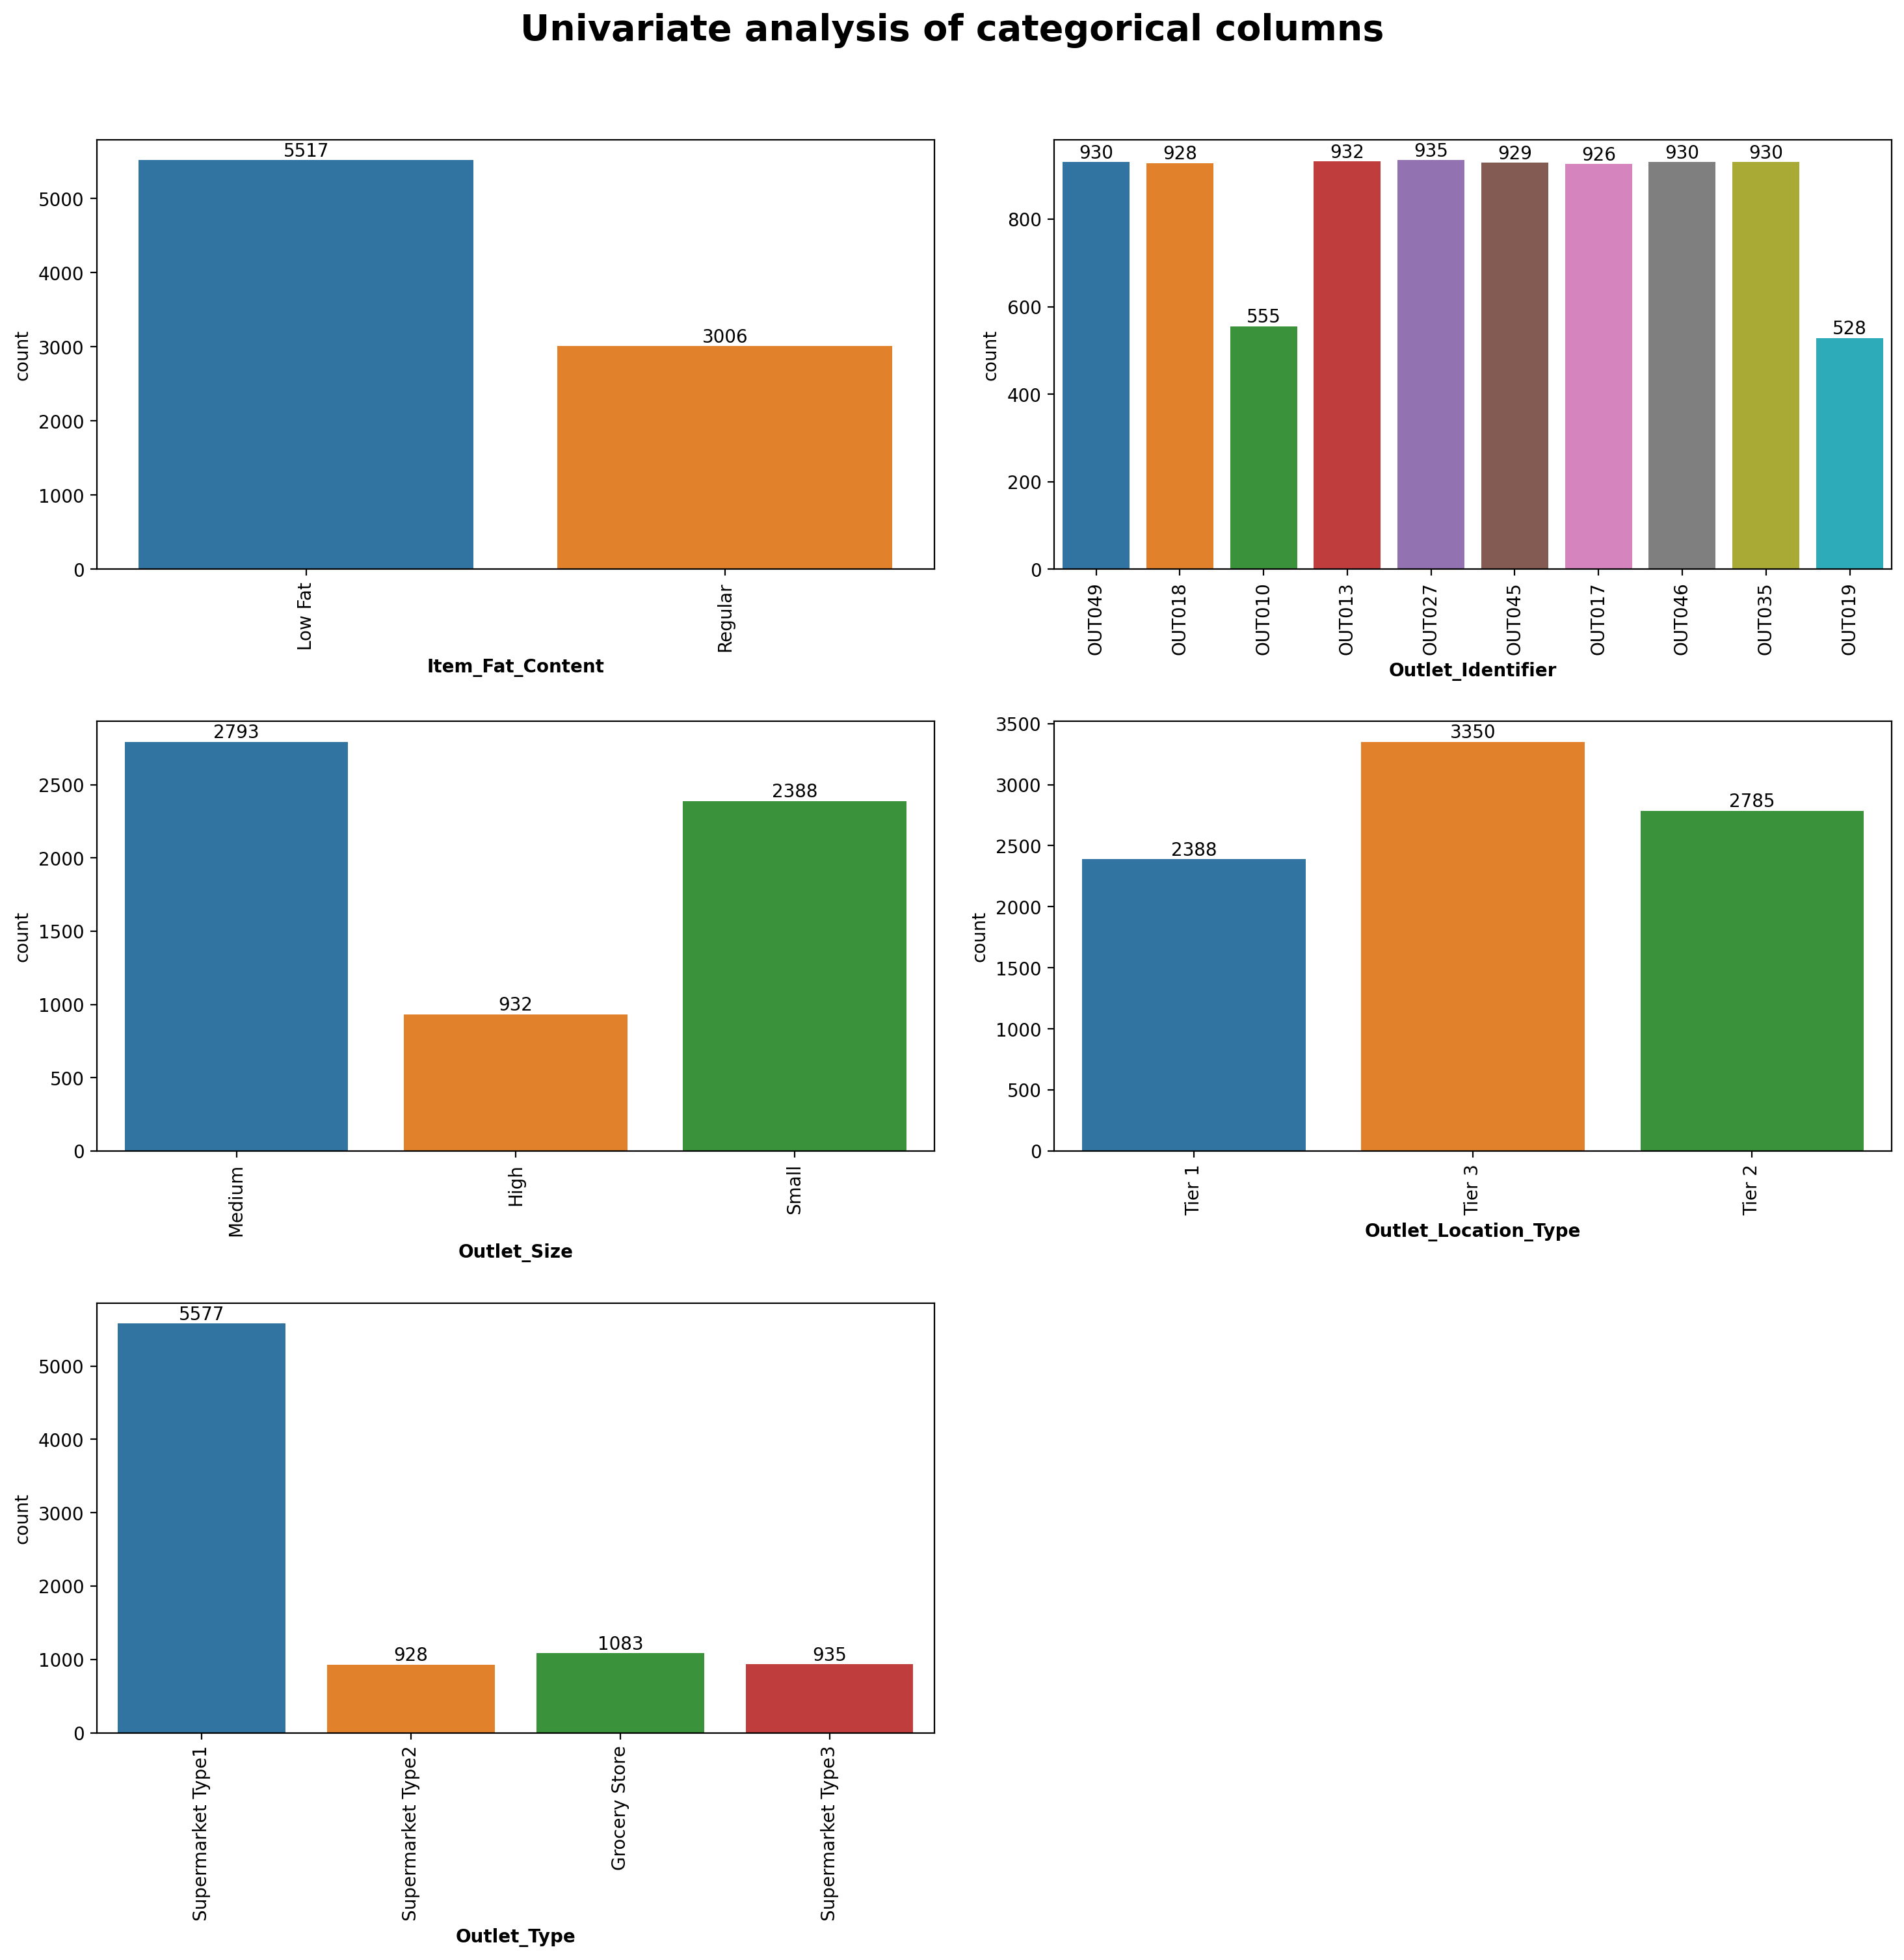

In [185]:
# Countplot for categorical columns
def univariate_countplot(data):
    plt.figure(figsize=(15,15),dpi=200)
    plt.suptitle('Univariate analysis of categorical columns',fontsize=20, fontweight='bold',alpha=1, y=1.01)
    i=0
    for col in data:
        if data[col].dtype == 'object' and col not in ['Item_Identifier','Item_Type']:
            
            plt.subplot(3,2,i+1)
            ax = sns.countplot(data[col])
            plt.xticks(rotation='vertical')
            plt.xlabel(col,fontdict={'fontsize':10,'fontweight':'bold'})
            plt.tight_layout(pad=2)
            i=i+1    
            
            for p in ax.containers:
                ax.bar_label(p,padding=0)
            

univariate_countplot(df)
##Number of Low fat product are getting sold more
##Maximun items are sold from OUT049,OUT046 and OUT035 having a count of 930 No of product
##Maximun items are sold from meduim sized outlet.
##Teir-3 cities have sold maximun count of product.
##Super market of type 1 has maximum count of product sold.

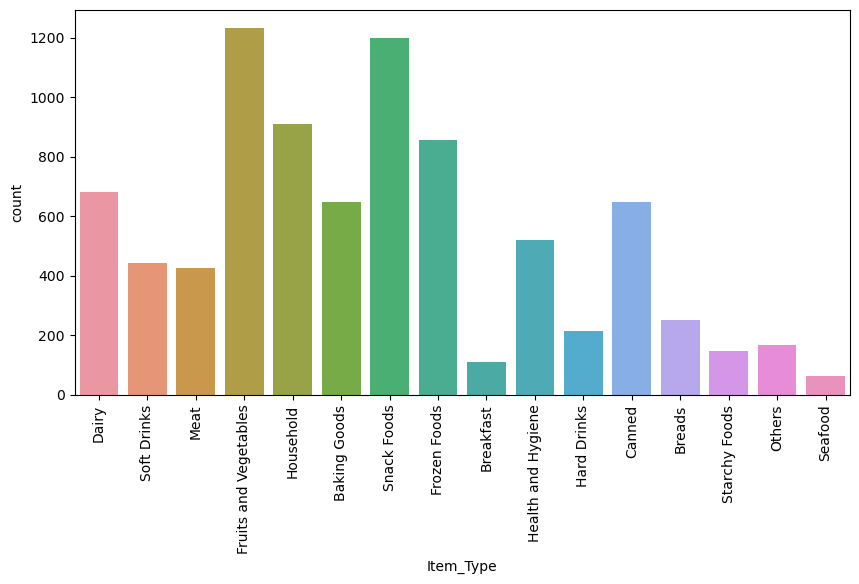

In [186]:
#Item type count plot
plt.figure(figsize=(10,5))
sns.countplot(df.Item_Type)
plt.xticks(rotation='vertical')
plt.show()
#Fruit and vegetable product selling count was more 

# Bivariate and Multivariate Anlaysis

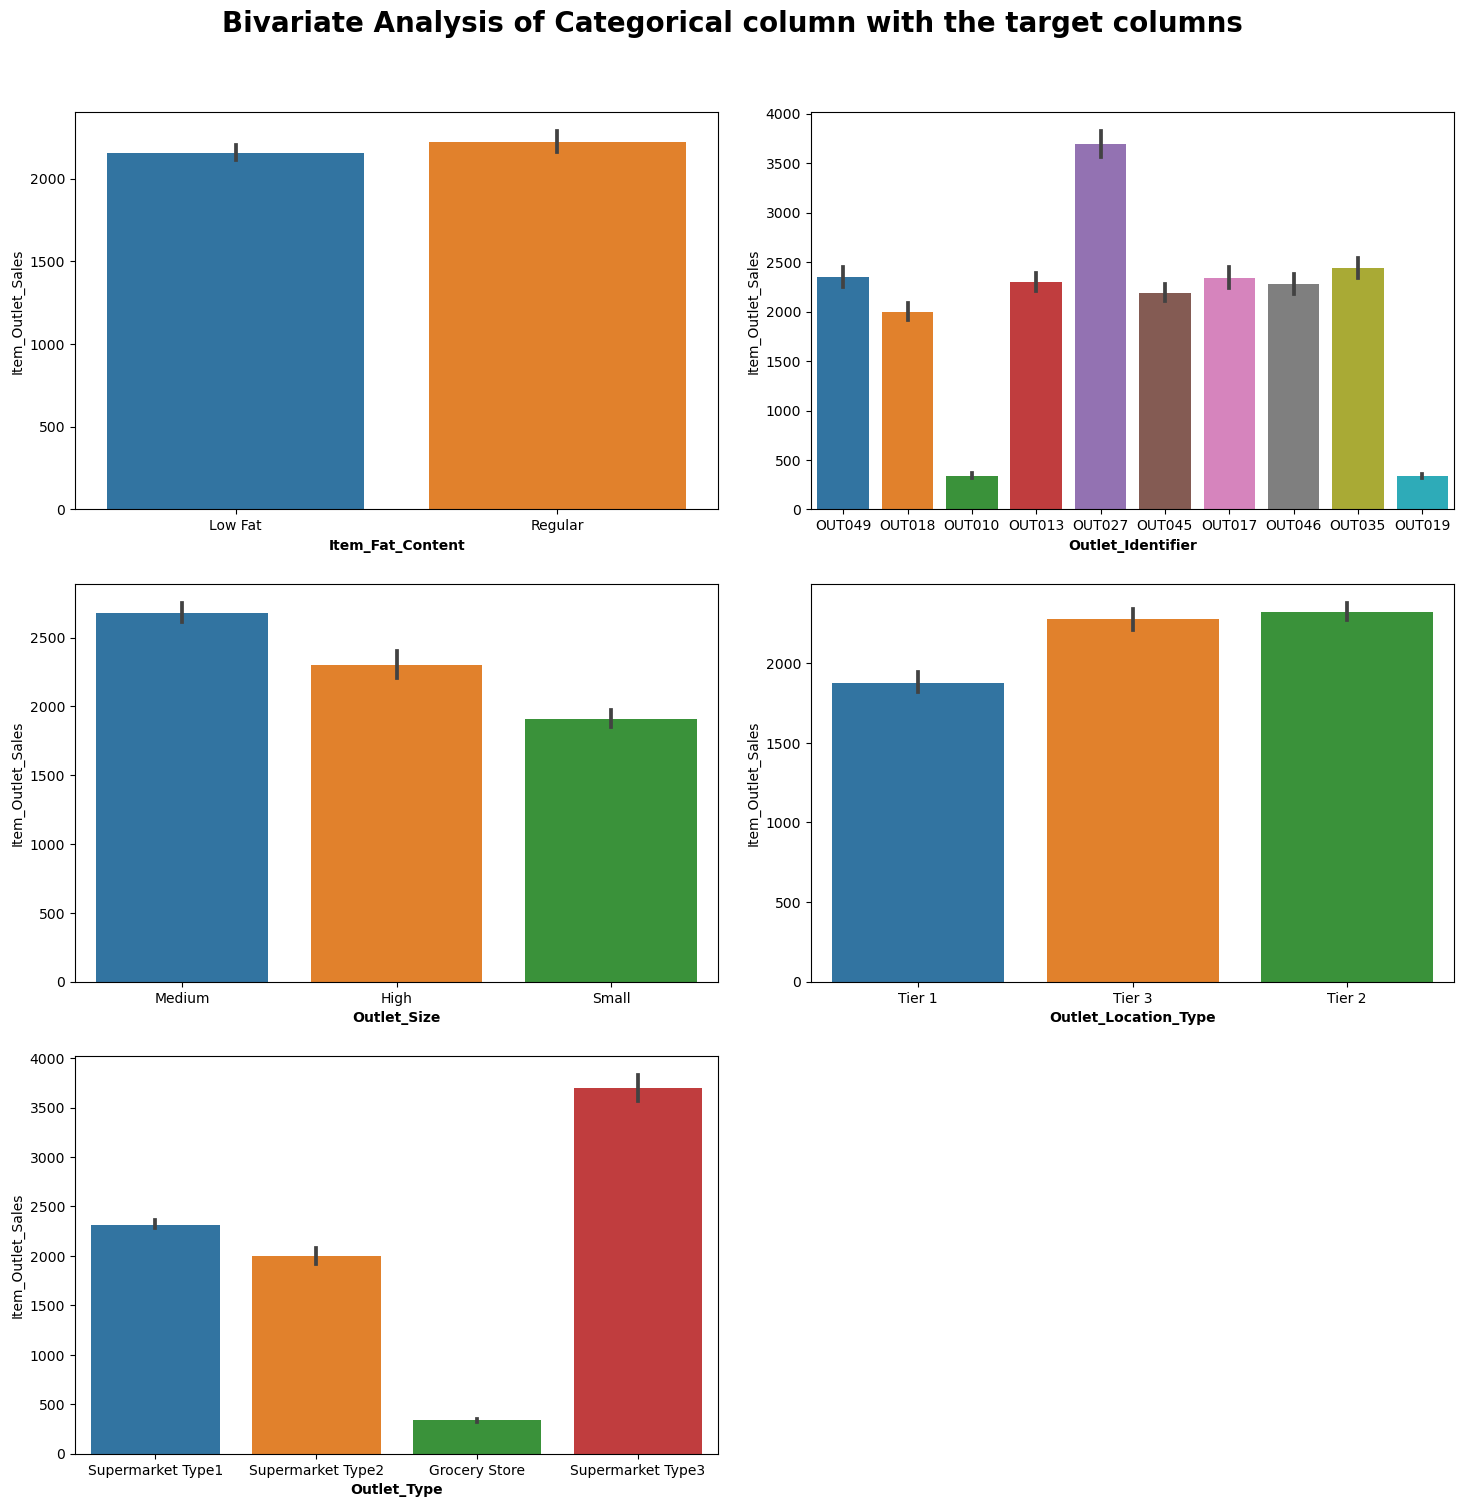

In [187]:
# Bar plot of categorical column with the targeted column (Item_Outlet_Sales)

def Bivariate_analysis_Categorical(data):
    plt.figure(figsize=(15,15))
    plt.suptitle('Bivariate Analysis of Categorical column with the target columns',fontsize=20,fontweight = 'bold', alpha =1,y =1.01)
    i=0
    for col in data:
        if data[col].dtype == 'object' and col not in ['Item_Identifier','Item_Type']:
            plt.subplot(3,2,i+1)
            sns.barplot(data[col],data['Item_Outlet_Sales'])
            plt.xlabel(col,fontdict={'fontsize':10,'fontweight':'bold'})
            plt.tight_layout(pad=2)
            i=i+1                
Bivariate_analysis_Categorical(df)    

#Product with Regular fat have more average sales executed.
#Outlet No OUT027 has done the more average sales.
#Meduim sized store have more average sales.
#tier-2 have more average sales even though the count of product sold by tier 3 was more.
#Supermarket 3 has more average sales as per the data available

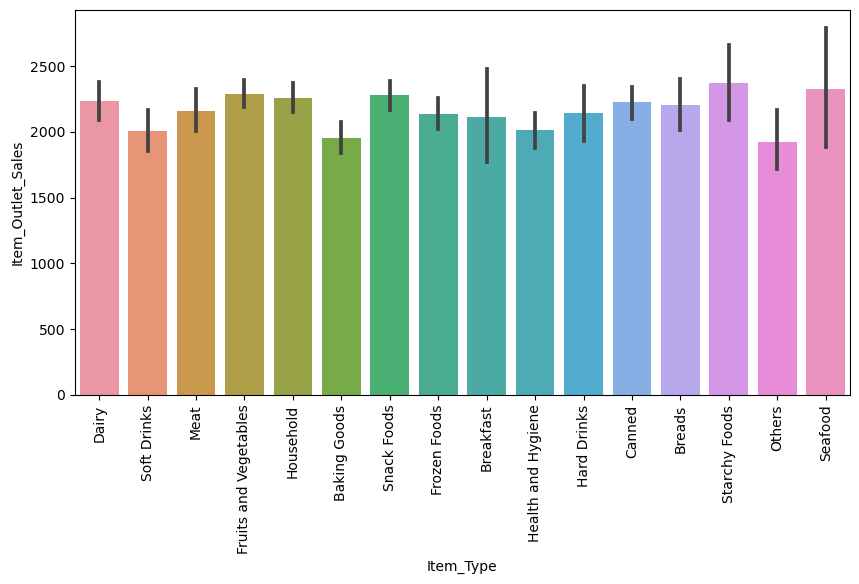

In [188]:
#Item_type bar plot
plt.figure(figsize=(10,5))
sns.barplot(df.Item_Type,df.Item_Outlet_Sales)
plt.xticks(rotation='vertical')
plt.show()
#Average sales of Starchy product were more.

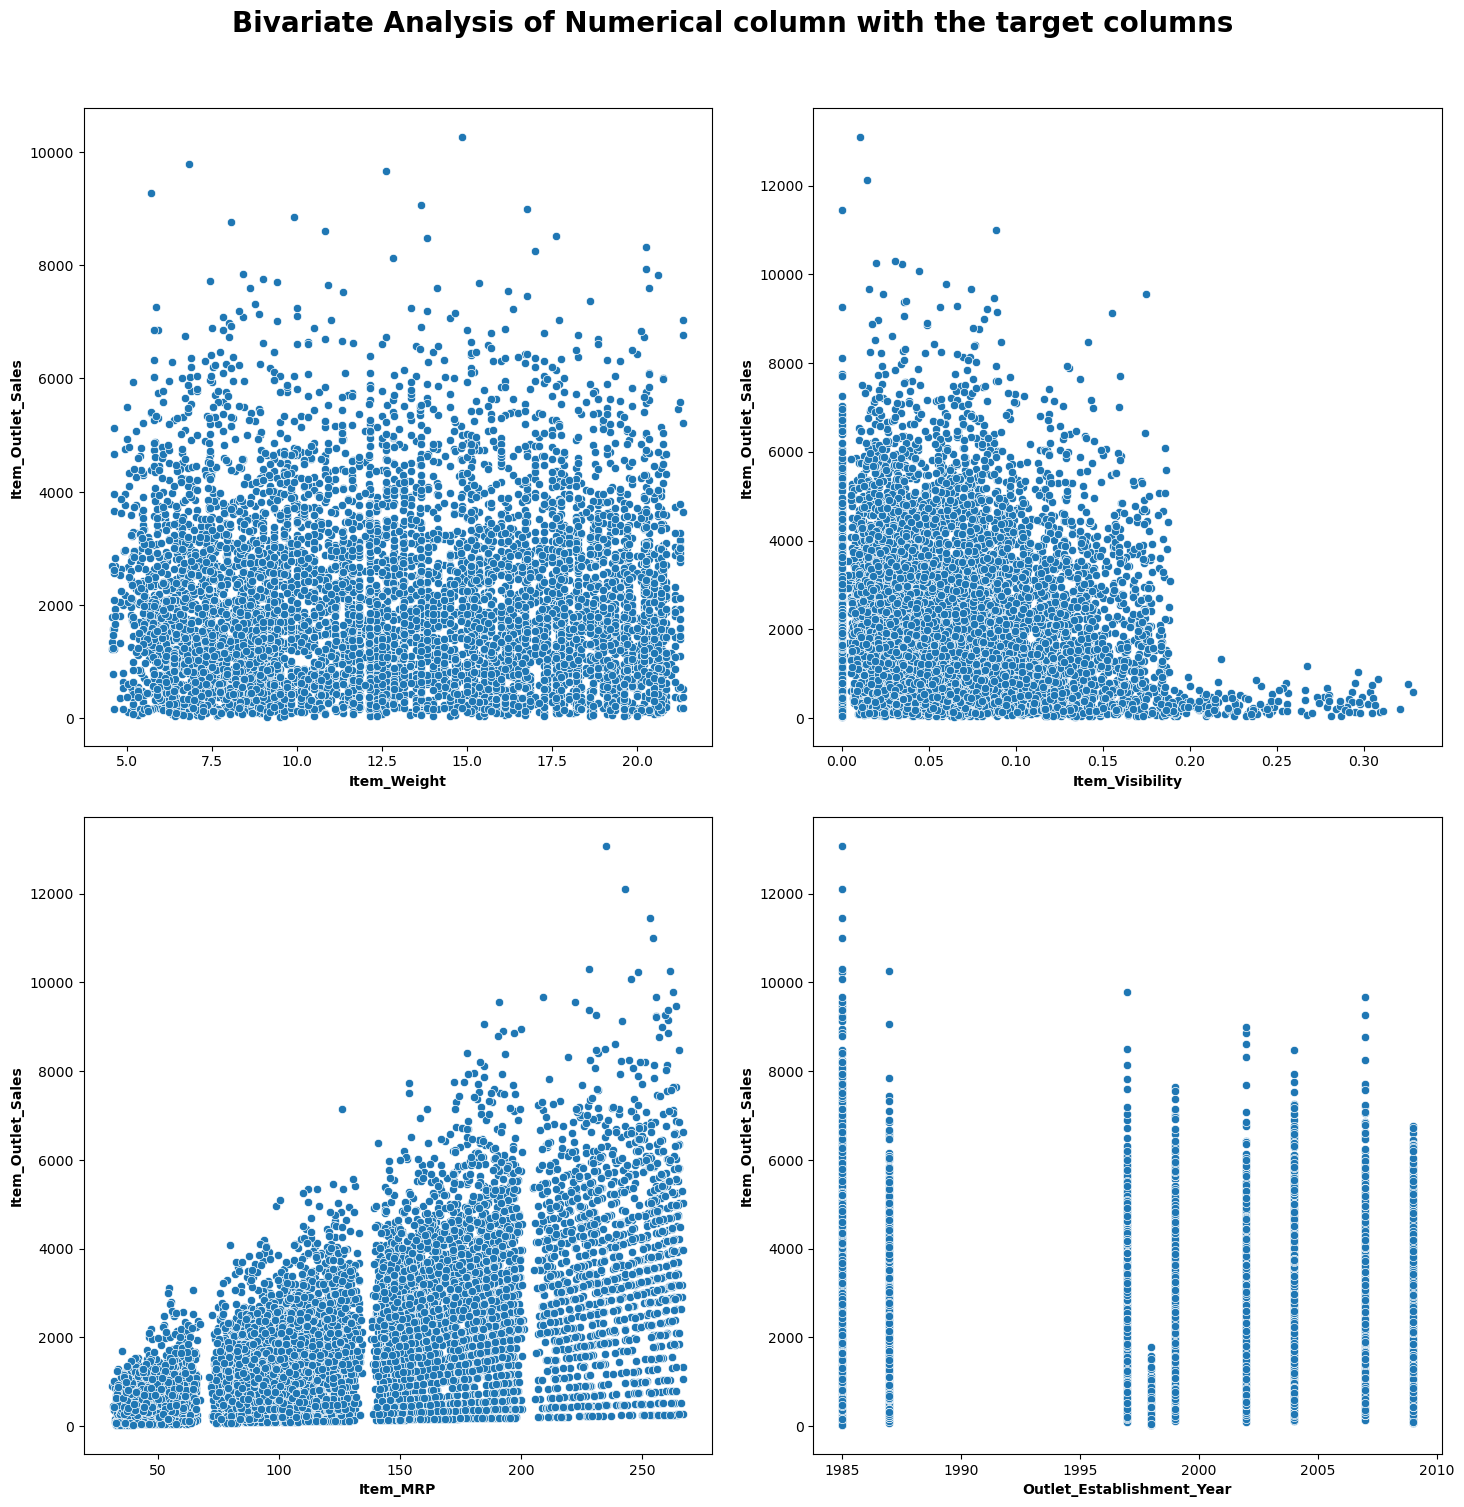

In [189]:
#Bivariate Analysis of numerical Features w.r.t. Target Feature (Price):

def Bivariate_analysis_numerical(data):
    plt.figure(figsize=(15,15))
    plt.suptitle('Bivariate Analysis of Numerical column with the target columns',fontsize=20,fontweight = 'bold', alpha =1,y =1.01)
    i=0
    for col in data:
        if data[col].dtype != 'object' and col not in ['Item_Outlet_Sales']:
            plt.subplot(2,2,i+1)
            sns.scatterplot(data[col],data['Item_Outlet_Sales'])
            plt.xlabel(col,fontdict={'fontsize':10,'fontweight':'bold'})
            plt.ylabel('Item_Outlet_Sales',fontdict={'fontsize':10,'fontweight':'bold'})            
            plt.tight_layout(pad=2)
            i=i+1
            
Bivariate_analysis_numerical(df)
# Maximum sales was seen in the year of 1985.

<AxesSubplot:>

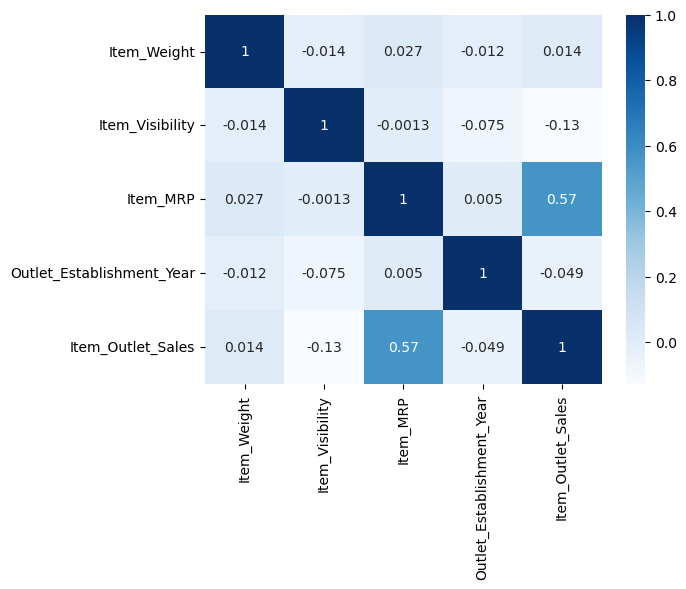

In [190]:
#plotting heat map
sns.heatmap(df.corr(),annot=True,cmap='Blues')

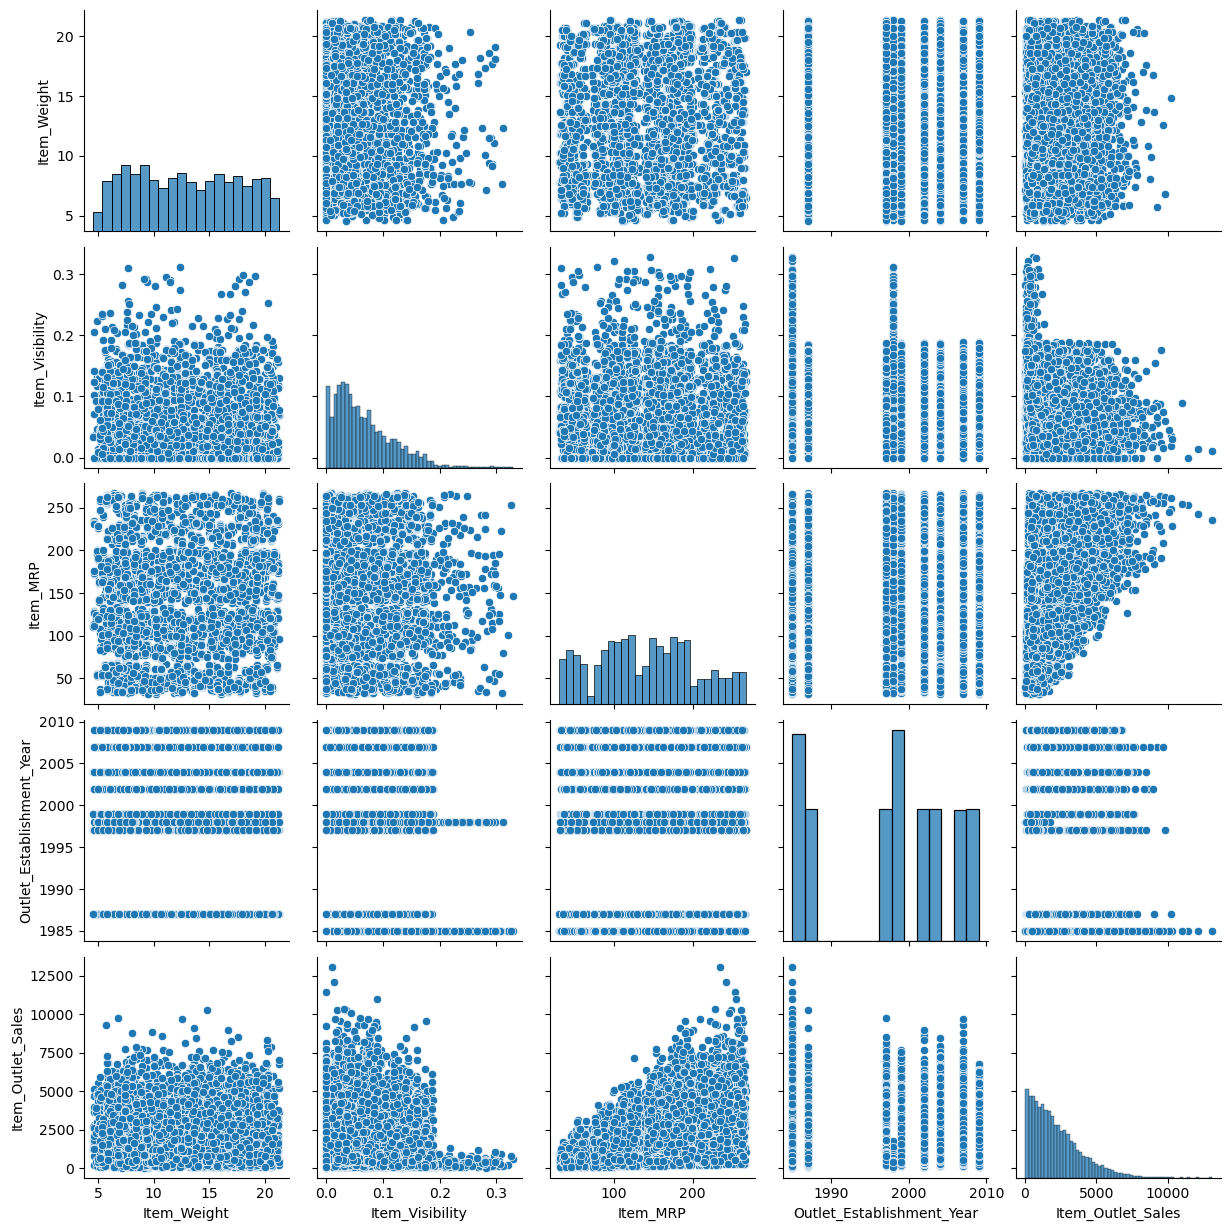

In [191]:
#pairplot analysis of numerical columns
sns.pairplot(df)
plt.show()

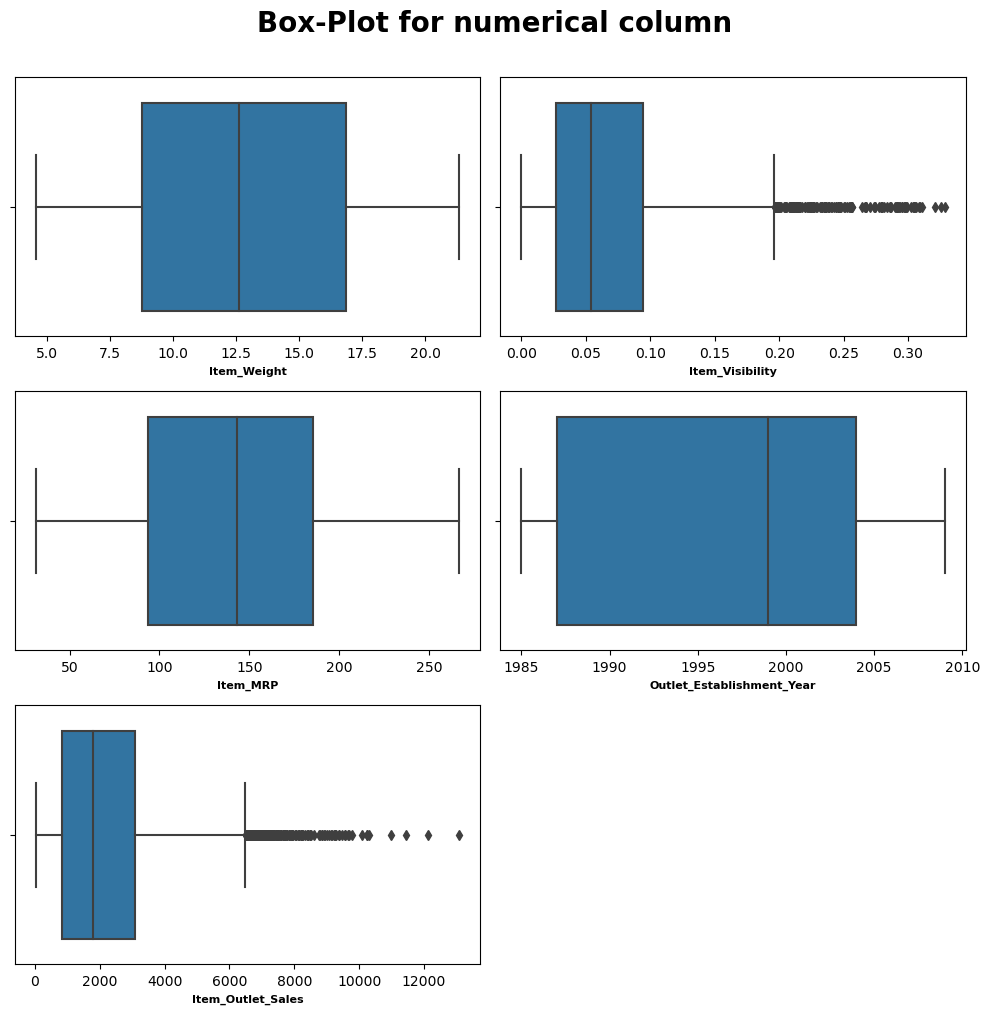

In [192]:
#check for outlier via plotting Box Plot og numerical column
def boxplot(data):
    plt.figure(figsize=(10,10))
    plt.suptitle('Box-Plot for numerical column',fontsize =20, fontweight='bold',alpha=1,y=1.01)
    i=0
    for col in data:
        if data[col].dtype != 'object':
            plt.subplot(3,2,i+1)
            sns.boxplot(data[col])
            plt.xlabel(col,fontdict={'fontsize':8,'fontweight':'bold'})
            plt.tight_layout()
            i+=1
            
boxplot(df)
#Outlier presence in Item_Visibility and Item_Outlet_sales feature of dataframe

In [193]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Feature Engineering

In [194]:
#dropping the Item_identifier column since it doesnot matter the tag of product with that to sales price
df.drop(columns=['Item_Identifier'],inplace=True)
df.sample(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4498,NaN,Low Fat,0.061686,Dairy,153.9998,OUT027,1985,Medium,Tier 3,Supermarket Type3,5229.1932
6418,NaN,Low Fat,0.129984,Household,93.0462,OUT019,1985,Small,Tier 1,Grocery Store,185.0924
354,7.71,Regular,0.066701,Snack Foods,55.2956,OUT049,1999,Medium,Tier 1,Supermarket Type1,1255.6988
8286,20.70,Low Fat,0.039307,Household,150.7366,OUT049,1999,Medium,Tier 1,Supermarket Type1,3325.0052
2514,19.35,Low Fat,0.118103,Snack Foods,224.8088,OUT046,1997,Small,Tier 1,Supermarket Type1,2013.3792


In [195]:
#split the input and output features
x = df.drop(columns=['Item_Outlet_Sales'])
y = df.Item_Outlet_Sales


In [196]:
#categorical columns in x
cat_cols = x.select_dtypes(include = 'object').columns
print('Categorical Columns in independent features dataset:',cat_cols)
print('='*125)

#numerical columns in x
num_cols = x.select_dtypes(include = ['int64','float64']).columns
print('Numerical Columns in independent features dataset:',num_cols)

Categorical Columns in independent features dataset: Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')
Numerical Columns in independent features dataset: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')


In [197]:
#split data into train and test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=101)

print('Shape of x_train:',x_train.shape)
print('Shape of x_test:',x_test.shape)

#training ctegorical columns
train_cat_cols = x_train.select_dtypes(include = 'object').columns
print('Categorical Columns in training dataset:',train_cat_cols)
print('='*125)

#training numerical columns
train_num_cols = x_train.select_dtypes(include = ['int64','float64']).columns
print('Numerical Columns in training dataset:',train_num_cols)

Shape of x_train: (7244, 10)
Shape of x_test: (1279, 10)
Categorical Columns in training dataset: Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')
Numerical Columns in training dataset: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')


In [198]:
#computing missing values in the given data set

#num param
numerical_imputing_param =('Num_impute',SimpleImputer(),['Item_Weight'])
#cat param
categorical_imputing_param =('cat_impute',SimpleImputer(strategy='most_frequent'),['Outlet_Size'])

#imputation columntransformer
imputing_param = [numerical_imputing_param,categorical_imputing_param]
imputing_missing_values = ColumnTransformer(transformers=imputing_param,remainder='passthrough') 


In [199]:
#Encoding the categorical features

#OHE param
OHE_encoding_param = ('OHE_encoding',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),
                      [4,6,9])
#OE param
OE_encoding_param = ('OE_encoding',OrdinalEncoder(),
                     [1,2,8])

#encoding columntransformer
encoding_param = [OHE_encoding_param,OE_encoding_param]
cat_encoding = ColumnTransformer(transformers=encoding_param,remainder='passthrough') 

In [200]:
#feature scaling of all the feature of extracted data for better result

scaling_params = [('scale',MinMaxScaler(),slice(1,34))] 

#scaler columntransformer
scaler = ColumnTransformer(transformers=scaling_params,remainder='passthrough')

In [201]:
#Selecting best feature for feature deduction and faster computation

#best_feature = SelectKBest(score_func=chi2,k=8)

In [202]:
#creating pipeline for the above feature engineering steps

pipe = Pipeline([
    ('imputing_missing_values',imputing_missing_values),
    ('cat_encoding',cat_encoding),
    ('scaler',scaler)
#    ('best_feature',best_feature)
])

from sklearn import set_config
set_config(display='diagram')

pipe

Pipeline(steps=[('imputing_missing_values',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Num_impute', SimpleImputer(),
                                                  ['Item_Weight']),
                                                 ('cat_impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Outlet_Size'])])),
                ('cat_encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE_encoding',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [4, 6, 9]),
                                                 ('OE_encoding',
                                                  OrdinalEncoder(),
                                                  [1, 2, 8])])),
                ('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', MinMaxScaler(),
                                                  slice(1, 34, None))]))])

In [203]:
#stepwise implementation of pipeline steps
x_train_copy = x_train.copy()

In [204]:
#applying imputation pipeline step
imputor = pipe['imputing_missing_values'].fit_transform(x_train_copy)
pd.DataFrame(imputor)
##imputor

,0,1,2,3,4,5,6,7,8,9
0,6.65,Medium,Low Fat,0.089196,Canned,147.0734,OUT010,1998,Tier 3,Grocery Store
1,7.76,Small,Low Fat,0.059352,Snack Foods,101.87,OUT046,1997,Tier 1,Supermarket Type1
2,10.0,High,Low Fat,0.089078,Health and Hygiene,147.1102,OUT013,1987,Tier 3,Supermarket Type1
3,12.842712,Medium,Low Fat,0.032949,Household,116.8124,OUT027,1985,Tier 3,Supermarket Type3
4,14.15,Medium,Low Fat,0.0,Canned,253.7014,OUT045,2002,Tier 2,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...
7239,5.0,Small,Low Fat,0.044005,Soft Drinks,188.853,OUT046,1997,Tier 1,Supermarket Type1
7240,14.65,Medium,Low Fat,0.170664,Hard Drinks,56.4614,OUT045,2002,Tier 2,Supermarket Type1
7241,12.5,Small,Low Fat,0.018849,Health and Hygiene,96.7384,OUT046,1997,Tier 1,Supermarket Type1
7242,9.695,Medium,Regular,0.129009,Baking Goods,226.9404,OUT017,2007,Tier 2,Supermarket Type1


In [205]:
#encoding pipeline step
encoding = pipe['cat_encoding'].fit_transform(imputor)
#pd.DataFrame(pipe['cat_encoding'].fit_transform(imputor))
print('The shape of x_train_copy after encoding columns comes out: ',encoding.shape)
print(' '*125)
print('='*125)
print(' '*125)
print(' '*125)

print('Encoded array below:')
encoding

The shape of x_train_copy after encoding columns comes out:  (7244, 34)
                                                                                                                             
                                                                                                                             
                                                                                                                             
Encoded array below:


array([[0.0, 0.0, 1.0, ..., 0.089196394, 147.0734, 1998],
       [0.0, 0.0, 0.0, ..., 0.059352241, 101.87, 1997],
       [0.0, 0.0, 0.0, ..., 0.089078338, 147.1102, 1987],
       ...,
       [0.0, 0.0, 0.0, ..., 0.018848862, 96.7384, 1997],
       [0.0, 0.0, 0.0, ..., 0.129008866, 226.9404, 2007],
       [0.0, 0.0, 0.0, ..., 0.161317495, 57.5562, 2009]], dtype=object)

In [206]:
#scaling pipeline step

scale = pipe['scaler'].fit_transform(encoding)
#pd.DataFrame(scale)
print('The shape of x_train_copy after scaling columns comes out: ',encoding.shape)
print(' '*125)
print('='*125)
print(' '*125)
print(' '*125)

print('Scaled array below:')
scale

The shape of x_train_copy after scaling columns comes out:  (7244, 34)
                                                                                                                             
                                                                                                                             
                                                                                                                             
Scaled array below:


array([[0.0, 1.0, 0.0, ..., 0.4914439147294718, 0.5416666666666714, 0.0],
       [0.0, 0.0, 0.0, ..., 0.2995775862654416, 0.5, 0.0],
       [0.0, 0.0, 0.0, ..., 0.4916001127342121, 0.0833333333333286, 0.0],
       ...,
       [0.0, 0.0, 0.0, ..., 0.27779645362617067, 0.5, 0.0],
       [0.0, 0.0, 0.0, ..., 0.8304402746368398, 0.9166666666666714, 0.0],
       [0.0, 0.0, 0.0, ..., 0.1114871747855673, 1.0, 0.0]], dtype=object)

In [207]:
#running all the steps for x_train in pipeline altogether

x_train_trf = pipe.fit_transform(x_train)
#y_train_trf = y_train


#creating dataframe for all the steps of pipeline - x_train
pd.DataFrame(x_train_trf)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.5,0.0,1.0,0.12474,0.271616,0.491444,0.541667,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.190831,0.180737,0.299578,0.5,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.324204,0.271257,0.4916,0.083333,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.5,0.0,1.0,0.493463,0.100333,0.363001,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.5,0.0,0.5,0.571301,0.0,0.944028,0.708333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.026496,0.134001,0.668778,0.5,0.0
7240,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.5,0.0,0.5,0.601072,0.519697,0.10684,0.708333,0.0
7241,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.473057,0.057398,0.277796,0.5,0.0
7242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.5,1.0,0.5,0.306043,0.392851,0.83044,0.916667,0.0


In [208]:
#running all the steps for x_test in pipeline altogether

x_test_trf = pipe.fit_transform(x_test)
#y_test_trf = y_test

#creating dataframe for all the steps of pipeline - x_test
pd.DataFrame(x_test_trf)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.5,0.0,1.0,0.383745,0.178295,0.291062,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.800536,0.125985,0.496679,0.083333,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.188449,0.241544,0.19428,0.5,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.5,0.0,0.5,0.961298,0.158488,0.03403,0.916667,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.5,0.0,0.5,0.178327,0.087995,0.514949,0.708333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.499368,0.179601,0.985964,0.0,0.0
1275,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.5,0.0,0.0,0.093778,0.248409,0.11662,0.583333,0.0
1276,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.5,0.0,1.0,0.56237,0.09367,0.415333,1.0,0.0
1277,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.087824,0.073382,0.621229,0.5,0.0


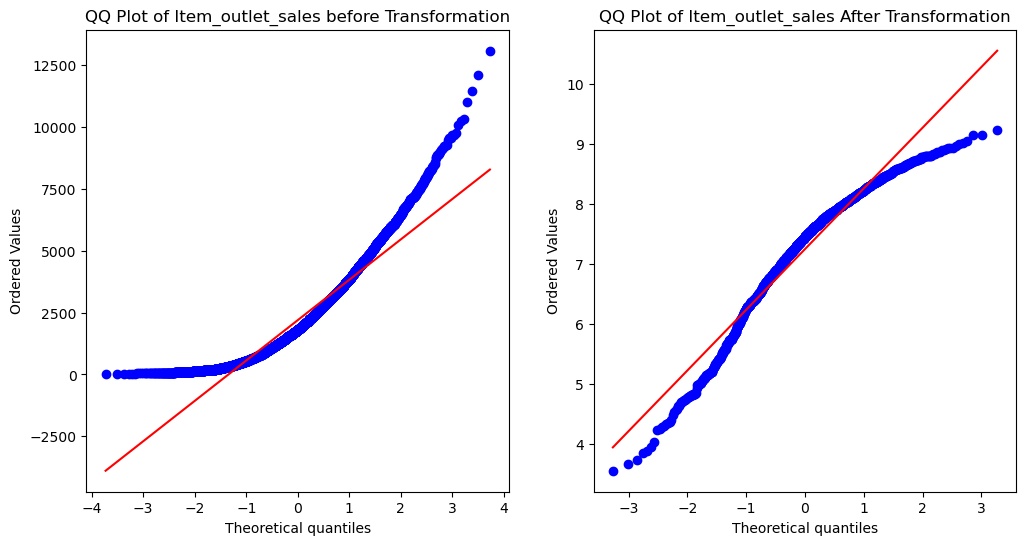

In [223]:
#function transformer for target column since its right skewed we will use log1p function

    
trf = ColumnTransformer(transformers=[('Function_transformer',FunctionTransformer(func=np.log1p),[0])])
y_train_trf =trf.fit_transform(pd.DataFrame(y_train))
y_test_trf = trf.transform(pd.DataFrame(y_test))    
    

    
plt.figure(figsize=(12,6))
plt.subplot(121)
stats.probplot(y_train,plot=plt,dist='norm')
plt.title('QQ Plot of Item_outlet_sales before Transformation')
    
plt.subplot(122)
stats.probplot(pd.DataFrame(y_test_trf)[0],plot=plt,dist='norm')
plt.title('QQ Plot of Item_outlet_sales After Transformation')
plt.show()    

#graphs implies the target colimn distribution got normilised which would give a better result
    

# Model Building

In [224]:
models = {
          'Linear Regression':LinearRegression(),
          'SGDRegressor' : SGDRegressor(),
#          'DecisionTreeRegressor' : DecisionTreeRegressor(),
          'XGBRegressor' : XGBRegressor(),
          'RandomForestRegressor' : RandomForestRegressor(),
#          'AdaBoostRegressor' : AdaBoostRegressor(),
          'GradientBoostingRegressor' : GradientBoostingRegressor()
#          'BaggingRegressor' : BaggingRegressor(),
#          'KNN' : KNeighborsRegressor()
  }

In [225]:
for model in models.values():
    print(model)

LinearRegression()
SGDRegressor()
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
RandomForestRegressor()
GradientBoostingRegressor()


In [232]:
def compare_model(models:dict):
    metrics = {'Model':models.keys(), 'r2_score': [], 'Mean_square_error': [], 'Mean_absolute_error': []}
    for model in models.values():
        #create an object for model
        model_object = model
        
        #fit the model
        model_object.fit(x_train_trf,y_train_trf)
        
        #predict the values of x_test_trf
        y_pred_trf = model.predict(x_test_trf)
        
        #claculate performance metrics
        
        r2_sc = r2_score(y_test_trf,y_pred_trf)
        mse = np.sqrt(mean_squared_error(y_test_trf,y_pred_trf))
        mae = mean_absolute_error(y_test_trf,y_pred_trf)
        
        #appendig the metrics dict
        
        metrics['r2_score'].append(r2_sc)
        metrics['Mean_square_error'].append(mse)
        metrics['Mean_absolute_error'].append(mae)
        
    #create dataframe of performance metrics
    models_metrics = pd.DataFrame(metrics)
    
    return models_metrics
    
    

In [233]:
#performance metrics without hyperparameter tunning
compare_model(models)
#Without hyper parameter tunning the best score comes out to be of GradientBoosting Regressor

,Model,r2_score,Mean_square_error,Mean_absolute_error
0,Linear Regression,0.719068,0.548425,0.427380
1,SGDRegressor,0.718249,0.549224,0.431596
2,XGBRegressor,0.701604,0.565214,0.442350
3,RandomForestRegressor,0.704696,0.562278,0.437327
4,GradientBoostingRegressor,0.732233,0.535421,0.413422


# Model Building with Hyperparameter Tunning

In [106]:
model_parameter = { 
                      'Linear_Regression_hyperparameter':{'fit_intercept':[True]},
                     'SGDRegressor_hyperparameter' : {'penalty':['l2','l1','elasticnet'],
                                                            'max_iter': [100,500,1000,1500]} ,
                     'XGBRegressor_hyperparameter' : {'n_estimators':[10,50,100,200],
                                                         'gamma':[0.2,0.4,0.6,0.8],
                                                         'learning_rate':[0.05,0.1,0.15,0.2,0.25]},
                     'RandomForestRegressor_hyperparameter' : {'n_estimators':[90,100,110,120],
                                                                 'random_state':[2,3,4],
                                                                 'max_samples':[0.4,0.5,0.6],
                                                                 'max_features':[0.25,0.5,0.75,1],
                                                                 'max_depth':[5,10,15]},
                     'GradientBoostingRegressor_hyperparameter' : {'learning_rate':[0.1,0.15,0.2,0.25],
                                                                       'n_estimators':[10,50,100,200],
                                                                        'min_samples_leaf':[1,2,4,5],
                                                                        'min_samples_split':[1,2,5]}
#                     'BaggingRegressor_hyperparameter' : {'base_estimator':[ DecisionTreeRegressor(),KNeighborsRegressor()],
#                                                              'n_estimators':[1,5,10,12,13,14,15,16,100],
#                                                                'max_samples':[0.2,0.5,0.75,1.0],
#                                                                'max_features':[0.2,0.5,0.75,1.0],
#                                                                'bootstrap_features':[False,True],
#                                                                 'bootstrap':[False,True]
#                                                         }
  }

In [107]:
model_keys_list = list(model_parameter.keys())
model_keys_list[0]
model_parameter[model_keys_list[0]]

{'fit_intercept': [True]}

In [108]:
#create function for computing the model with hyperparameter tunning

def model_selection(list_of_models,hyperparameter_dict):
    result = []
    i = 0
    for model in list_of_models.values():
        
        #select the keys
        keys= model_keys_list[i]
        
        #get the parameters
        params = hyperparameter_dict[keys]
        
        #grid search Cv object
        gridsearch = GridSearchCV(estimator=model,param_grid=params,cv=5, n_jobs=-1,scoring='r2')
        gridsearch.fit(x_train_trf,y_train_trf)
        #appending the result
        result.append({'Model used':model, 'Best_params':gridsearch.best_params_ })
        i=i+1
        
    return result
                
    

In [109]:
#calling model_selection for computing model with best params and efficiency
model_selection(models,model_parameter)


[{'Model used': LinearRegression(), 'Best_params': {'fit_intercept': True}},
 {'Model used': SGDRegressor(),
  'Best_params': {'max_iter': 100, 'penalty': 'l1'}},
 {'Model used': XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
  'Best_params': {'gamma': 0.2, 'learning_rate': 0.05, 'n_e

In [234]:
#models with best hyperparameter tunning
model_parameter_tunned ={
          'Linear Regression':LinearRegression(),
          'SGDRegressor' : SGDRegressor(max_iter=100,penalty='l1'),
#          'DecisionTreeRegressor' : DecisionTreeRegressor(),
          'XGBRegressor' : XGBRegressor(),
          'RandomForestRegressor' : RandomForestRegressor(max_depth=5,max_features=0.75,
                                                          max_samples=0.4,n_estimators=100,random_state=3),
#          'AdaBoostRegressor' : AdaBoostRegressor(),
          'GradientBoostingRegressor' : GradientBoostingRegressor(learning_rate=0.1,min_samples_leaf=2,min_samples_split=5,
                                                                 n_estimators=100)
#          'BaggingRegressor' : BaggingRegressor(),
#          'KNN' : KNeighborsRegressor()
  }

models_with_tuning = compare_model(model_parameter_tunned)
models_with_tuning
#after Hyperparameter tunning XBGRegressor out perform against the other algorithm with efficiency of 73%   

,Model,r2_score,Mean_square_error,Mean_absolute_error
0,Linear Regression,0.719068,0.548425,0.427380
1,SGDRegressor,0.716022,0.551390,0.427898
2,XGBRegressor,0.701604,0.565214,0.442350
3,RandomForestRegressor,0.699232,0.567456,0.439670
4,GradientBoostingRegressor,0.732391,0.535263,0.413192


# Flow of the Sales Prediction of model deployed in Pickle

In [270]:
#Pipeline and model working after deploying the same in pickle etc

##let x_input be the inputed data whose sales is to be predicted 
x_input = pd.DataFrame((np.array(x_train.iloc[1,:]).reshape(1,10)),columns=x_train.columns)


#Pipeline steps transformation of x_input 
x_input_trf = pipe.transform(x_input)

##best Algorithm applied on the transformed inputted data
gbr = GradientBoostingRegressor(learning_rate=0.1,min_samples_leaf=2,min_samples_split=5,
                                                                 n_estimators=100)

##model already fitted on training set during model building
gbr.fit(x_train_trf,y_train_trf)
y_pred_sales = np.exp(gbr.predict(x_input_trf))

print(' '*125)
print('The predicted value of sales based on input data with r2_score of 72% is:', y_pred_sales )
print(' '*125)


                                                                                                                             
The predicted value of sales based on input data with r2_score of 72% is: [1512.73205005]
                                                                                                                             


# **The summary of the steps executed in ML model are:**
**1. Data collection and overview of the dataframe:**
- The data was extracted from csv file downloaded from kaggle.
- Data consist of 8523 rows and 12 columns.
- Intuition of the data was gained via calling the first five and last five rows.
- There were 17% data missing in Item_weight and 28% data missing in Outlet_Size.
- Check for duplicated value of Dataframe was done. Luckily there was no duplicated data/row present in Dataframe.
- Info of the Dataframe was reviewed.
- Function to get value_counts corresponding to unique categories was created.
- Item_identifier feature was dropped since it doesnot matter the tag of product with that to sales price.

**2. Feature Engineering:**

Pipeline was created for all the feature engineering works for the dataframe for ease of deployment of model.Step of same is as follow:
- **Step1 Missing Value Imputation**: The missing value in the item_weight was imputed with the mean of the item_weight feature and the missing value of Outlet_size was imputed with the mode of the Outlet_size feature. 
- **Step2 Encoding of categorical columns**: Columntransformer object was created for Onehotencoding of Item_Fat_Content, Outlet_size and Outlet_Location_Type. Another Columntransformer object was created for Ordinal encoding of Outlet_Type, Item_type and Outlet_Identifier.   
- **Step3 Scaling**: Scaling of all the columns after encoding was done in order to get efficient end result of the final model.


**Feature Construction:** 
- Item fat count column was having naming issue (same kind of product was having different name- Rectification of categories was done)
- Since the QQ plot of the target column Item_sale_price was right skewed. Function transformer with log1p fuction was performed for target column Item_sale_price. The same led to transformation of Item_sale_price to normall distribution as depicted in QQ plot.  

**5. Model Building:**

- Train test split was performed with test_size as 20% and random state of 0.2.
- Further **eleven** model was fitted for the splitted data set and various accuracy_score/prescission score was fetched. 

**Name of model used are below:**
- Linear Regression
- SGDRegressor
- XGBRegressor
- RandomForestRegressor
- GradientBoostingRegressor

Hyperparameter Tunning was performed through gridsearchcv of all the above mentioned model to get the best hyperparameter tunned Machine Learning program. 

**6. Conclusion:**

- **GradientBoostingRegressor algorithm** outstanded the performance of model with **r2_score of ~73%**

**Note: The dataframe available maximun achieved score in kaggle was 61-62%. Since the r2_score of mine model comes out to be 73%,so i finalised the model for any kind of further prediction of Sales price.**